In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
import torch
torch.rand(10)
import torch.nn as nn
import torch.nn.functional as F

print(torch.cuda.is_available())
print(torch.cuda.get_device_name())
print(torch.cuda.current_device())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

True
TITAN RTX
0
Using device: cuda

TITAN RTX
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [2]:
# get number of classes in dataset
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('/home/user01/data_ssd/Talha/yolo/paprika_y4/train/_classes.txt')
print(num_classes)

6


In [3]:
#start training
#-b batch size (you should keep this low (2-4) for training to work properly)
#-s number of subdivisions in the batch, this was more relevant for the darknet framework
#-l learning rate
#-g direct training to the GPU device
#pretrained invoke the pretrained weights that we downloaded above
#classes - number of classes
#dir - where the training data is
#epoch - how long to train for
#train_label_path - path to .txt file containing labels

os.chdir('/home/user01/data_ssd/Talha/yolo/paprika_y4/')

!python /home/user01/data_ssd/Talha/yolo/pytorch-YOLOv4/train.py \
        -b 8 -s 1 -l 0.001 -g 2 \
        -pretrained /home/user01/data_ssd/Talha/yolo/pytorch-YOLOv4/cfg/yolov4.conv.137.pth \
        -classes {num_classes} \
        -dir /home/user01/data_ssd/Talha/yolo/paprika_y4/train/ \
        -train_label_path /home/user01/data_ssd/Talha/yolo/paprika_y4/data/train.txt \
        -epochs 100

log file path:log/log_2021-04-30_11-44-50.txt
2021-04-30 11:44:50,499 train.py[line:435] INFO: Using device cuda
2021-04-30 11:44:54,426 train.py[line:282] INFO: Starting training:
        Epochs:          100
        Batch size:      8
        Subdivisions:    1
        Learning rate:   0.001
        Training size:   11028
        Validation size: 19
        Checkpoints:     True
        Device:          cuda
        Images size:     608
        Optimizer:       adam
        Dataset classes: 6
        Train label path:/home/user01/data_ssd/Talha/yolo/paprika_y4/data/train.txt
        Pretrained:
    
Epoch 1/100:   0%|     | 0/11028 [00:02<?, ?img/s]
Traceback (most recent call last):
  File "/home/user01/data_ssd/Talha/yolo/pytorch-YOLOv4/train.py", line 447, in <module>
    device=device, )
  File "/home/user01/data_ssd/Talha/yolo/pytorch-YOLOv4/train.py", line 310, in train
    for i, batch in enumerate(train_loader):
  File "/home/user01/anaconda3/envs/yolo4/lib/python3.6/site-pac

In [5]:
#looking at the weights that our model has saved during training
os.chdir('/home/user01/data_ssd/Talha/yolo/paprika_y4/')
!ls checkpoints

Yolov4_epoch1.pth


In [7]:
#choose random test image
import os
test_images = [f for f in os.listdir('/home/user01/data_ssd/Talha/yolo/paprika_y4/test') if f.endswith('.jpg')]
import random
img_path = "/home/user01/data_ssd/Talha/yolo/paprika_y4/test/" + random.choice(test_images);
print(img_path)

/home/user01/data_ssd/Talha/yolo/cells_v4/test/BloodImage_00266_jpg.rf.2521623f1047a9502b2705a626ad6655.jpg


In [ ]:
'''
Or open my_inference.py file to get eval(.txt) files
'''
##change the epoch here to the one you would like to use for inference
!python /home/user01/data_ssd/Talha/yolo/pytorch-YOLOv4/models.py \
        {num_classes} \
        /home/user01/data_ssd/Talha/yolo/paprika_y4/checkpoints/Yolov4_epoch1.pth \
        {img_path} \
        /home/user01/data_ssd/Talha/yolo/paprika_y4/test/_classes.txt

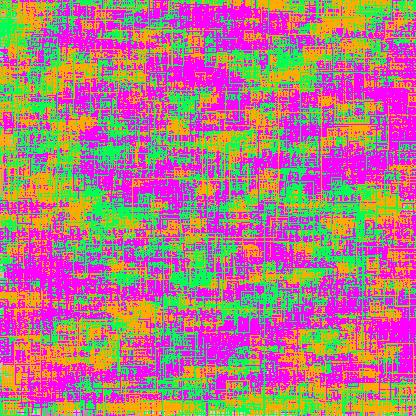

In [9]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')

In [1]:
%cd /home/user01/data_ssd/Talha/yolo/
!git clone https://github.com/JunnYu/mish-cuda

/home/user01/data_ssd/Talha/yolo
Cloning into 'mish-cuda'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 195 (delta 7), reused 79 (delta 3), pack-reused 107
Receiving objects: 100% (195/195), 208.77 KiB | 1.22 MiB/s, done.
Resolving deltas: 100% (56/56), done.
